# Hacking Score

We explore how different scores affect the results. We then will see what information leakage will do.

In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

## !X-Tandem

INFO:root:Cupy is not available
INFO:root:Filter df with x_tandem score


--- x! ---


INFO:root:Global FDR on precursor
INFO:root:44,764 target (447 decoy) of 85,276 PSMs. FDR 0.009986 for a cutoff of 24.86 (set FDR was 0.01).


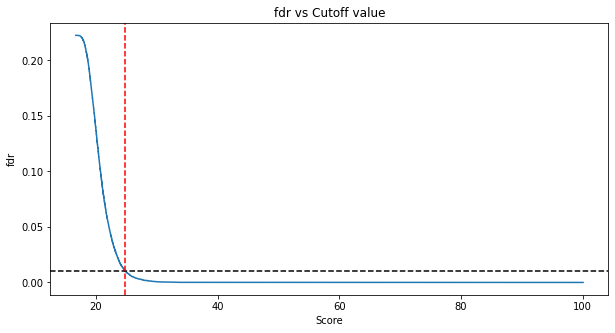

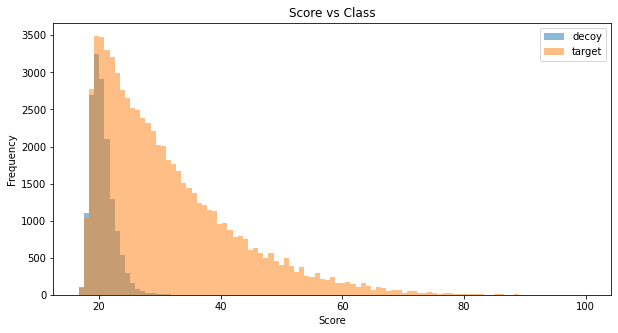

INFO:root:Global FDR cutoff at 24.862.


In [2]:
import alphapept.io

file_path = 'thermo_HeLa.ms_data.hdf'
from alphapept.score import get_ML_features, filter_with_ML, filter_with_x_tandem, cut_global_fdr, train_RF

ms_file = alphapept.io.MS_Data_File(file_path)

df = ms_file.read(dataset_name='second_search')
df = get_ML_features(df)

xt = df.copy()

print('--- x! ---')
xt = filter_with_x_tandem(xt)
xt = cut_global_fdr(xt, analyte_level='precursor',  plot=True)

## ML

--- ML ---


INFO:root:59,486 target (5,948 decoy) of 85,308 PSMs. FDR 0.099990 for a cutoff of 20.77 (set FDR was 0.1).
INFO:root:Training & cross-validation on 12,754 targets and 12,754 decoys
INFO:root:The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 200}
INFO:root:The train accuracy was 0.937
INFO:root:Testing on 51,016 targets and 51,016 decoys
INFO:root:The test accuracy was 0.913
INFO:root:ML Top features
INFO:root:1	generic_score                  0.2108
INFO:root:2	hits_y                         0.1808
INFO:root:3	x_tandem                       0.1278
INFO:root:4	hits                           0.1014
INFO:root:5	fragments_matched_n_ratio      0.0654
INFO:root:6	n_fragments_matched            0.0526
INFO:root:7	fragments_matched_int_ratio    0.0447
INFO:root:8	fragments_matched_int_sum      0.0313
INFO:root:9	delta_m_ppm_abs                0.0246
INFO:root:10	n_missed                       0.0193
INFO:root:11	prec_offset              

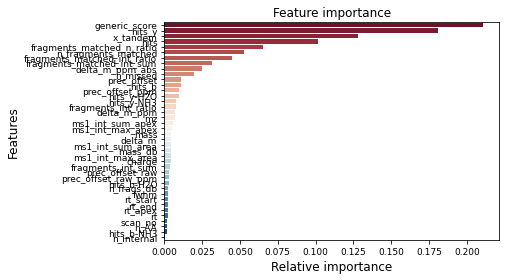

INFO:root:Filter df with x_tandem score
/Users/flq567/miniconda3/envs/alphapept/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
INFO:root:Global FDR on precursor
INFO:root:52,780 target (527 decoy) of 85,049 PSMs. FDR 0.009985 for a cutoff of 0.71 (set FDR was 0.01).


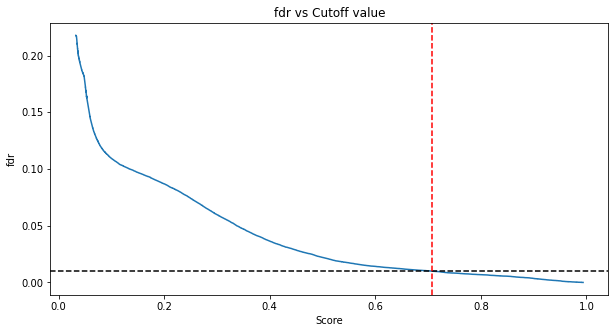

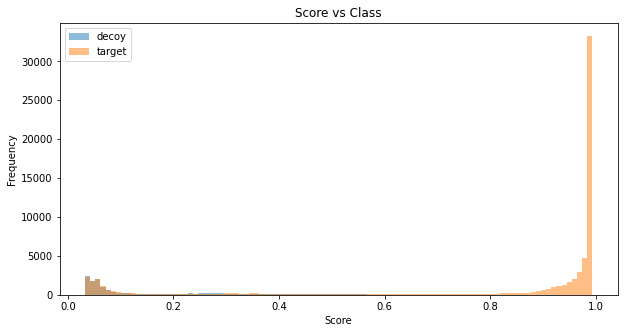

INFO:root:Global FDR cutoff at 0.707.


In [3]:
ml = df.copy()

print('--- ML ---')
cv, features = train_RF(ml, plot=True)
ml = filter_with_ML(ml, cv, features = features)
ml = cut_global_fdr(ml, analyte_level='precursor',  plot=True)

## ML with information leakage

--- ML ---


INFO:root:59,486 target (5,948 decoy) of 85,308 PSMs. FDR 0.099990 for a cutoff of 20.77 (set FDR was 0.1).
INFO:root:Training & cross-validation on 12,754 targets and 12,754 decoys
INFO:root:The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 150}
INFO:root:The train accuracy was 1.000
INFO:root:Testing on 51,016 targets and 51,016 decoys
INFO:root:The test accuracy was 1.000
INFO:root:ML Top features
INFO:root:1	super_feature                  0.4032
INFO:root:2	generic_score                  0.1396
INFO:root:3	hits_y                         0.1340
INFO:root:4	x_tandem                       0.0753
INFO:root:5	hits                           0.0746
INFO:root:6	fragments_matched_n_ratio      0.0257
INFO:root:7	n_fragments_matched            0.0253
INFO:root:8	fragments_matched_int_ratio    0.0205
INFO:root:9	delta_m_ppm_abs                0.0158
INFO:root:10	fragments_matched_int_sum      0.0137
INFO:root:11	n_missed                 

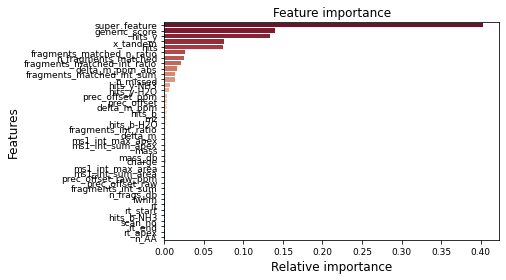

INFO:root:Filter df with x_tandem score
/Users/flq567/miniconda3/envs/alphapept/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
INFO:root:Global FDR on precursor
INFO:root:75,362 target (753 decoy) of 84,756 PSMs. FDR 0.009992 for a cutoff of 0.07 (set FDR was 0.01).


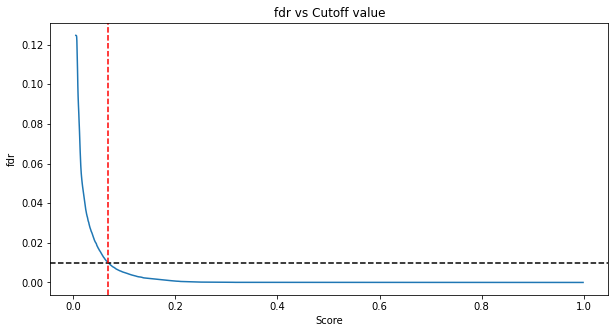

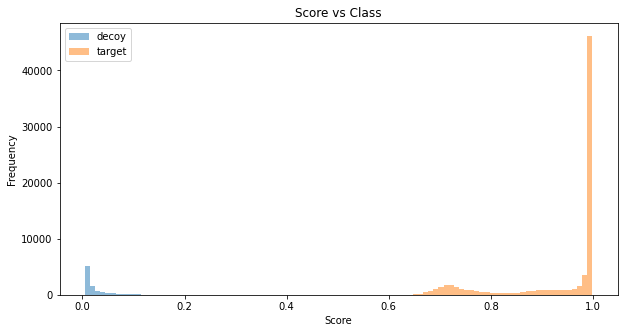

INFO:root:Global FDR cutoff at 0.069.


In [4]:
print('--- ML ---')
ml_fake = df.copy()

ml_fake['super_feature'] = ml_fake['decoy']

cv, features = train_RF(ml_fake, plot=True)
ml_fake = filter_with_ML(ml_fake, cv, features = features)
ml_fake = cut_global_fdr(ml_fake, analyte_level='precursor',  plot=True)